# Census Income

## We are going to predict weather aperson makes over 50k per year or not

#### Let's start with importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Markdown,display

def printmd(string, color="purple"):
    colorstr = "<span style = 'color:{}' >{}</span>".format(color,string)
    display(Markdown(colorstr))

## We will use "IPython.display" for print function, to see bold & colorfull text

##### This dataset is already splited in train & test data, we have to concatenate the data for our analysis

In [2]:
# Defining Columns

columns_names = ["age","workclass","fnlwgt","education","educational-num","marital-status","occupation","relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country","target"]

### Loading  Final Dataset

In [3]:
train = pd.read_csv("adult.data.csv", sep = ",\s", header = None, names = columns_names, engine = "python")
printmd("**Train Data**")
train.head()

<span style = 'color:purple' >**Train Data**</span>

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train.shape

(32561, 15)

In [5]:
test = pd.read_csv("adult.test.csv", sep=",\s", header=None, names= columns_names, engine= "python")
test["target"].replace(regex=True, inplace = True, to_replace=r"\.",value=r"")
printmd("**Test Data**")
test.head()

<span style = 'color:purple' >**Test Data**</span>

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,target
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K


In [6]:
test.shape

(16282, 15)

In [7]:
test.drop(0,axis=0,inplace=True)
test.shape

(16281, 15)

## Now we are going to Add / Concatenate, the train & test Data

In [8]:
df = pd.concat([train,test])
df.reset_index(inplace = True, drop=True)
printmd("**Final Data**")
df.head()

<span style = 'color:purple' >**Final Data**</span>

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [9]:
df.shape

(48842, 15)

# 1) Basic Analysis

##### converting all categorical columns to type category

In [10]:
for col in set(df.columns) - set(df.describe().columns):
    df[col] = df[col].astype("category")
    
printmd("**Columnns & their types**")
df.info()

<span style = 'color:purple' >**Columnns & their types**</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  category
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  float64 
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  float64 
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  float64 
 11  capital-loss     48842 non-null  float64 
 12  hours-per-week   48842 non-null  float64 
 13  native-country   48842 non-null  category
 14  target           48842 non-null  category
dtypes: category(10), float64(5)
memory usage: 2.4 MB


In [11]:
printmd("**Statistics**")
df.describe()

<span style = 'color:purple' >**Statistics**</span>

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
printmd("**Let's see the Total number of individuals making more 50K per year, in numbers as well as in percentage**")
total_records = df.shape[0]
income_greater_50K = df[df["target"] == ">50K"].shape[0]
income_at_most_50K = df[df["target"] == "<=50K"].shape[0]
greater_percent = (income_greater_50K / total_records)*100

print("Total number of records: {}".format(total_records))
print("Individuals making more than 50K INR :{}".format(income_greater_50K))
print("Individuals making at most  50K INR :{}".format(income_at_most_50K))
print("Percentage of individuals making more than 50K INR:{}%".format((greater_percent)))

<span style = 'color:purple' >**Let's see the Total number of individuals making more 50K per year, in numbers as well as in percentage**</span>

Total number of records: 48842
Individuals making more than 50K INR :11687
Individuals making at most  50K INR :37155
Percentage of individuals making more than 50K INR:23.928176569346054%


### 1.1 Searching for Null values

In [13]:
printmd("**Missing values**")

for i,j in zip (df.columns,(df.values.astype(str) == "?").sum(axis=0)):
    if j > 0:
        printmd(str(i) + " : " +str(j) + " records")

<span style = 'color:purple' >**Missing values**</span>

<span style = 'color:purple' >workclass : 2799 records</span>

<span style = 'color:purple' >occupation : 2809 records</span>

<span style = 'color:purple' >native-country : 857 records</span>

In [14]:
printmd("**Missing values in Percentage**")

col_names =df.columns
num_df = df.shape[0]

for c in col_names:
        num_non = df[c].isin(["?"]).sum()
        if num_non > 0:
            print(c)
            print(num_non)
            print("{0:.2f}%".format(float(num_non)/ num_df * 100))

<span style = 'color:purple' >**Missing values in Percentage**</span>

workclass
2799
5.73%
occupation
2809
5.75%
native-country
857
1.75%


### 1.2 Treating Missing values by Predicting them for each of 3 columns

#### importing some important libraries to predict missing values

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [16]:
printmd("**Creating one hot encoding of the categorical columns**")

def oneHotCatVars(df, df_cols):
    df1 = df_data = df.drop(columns = df_cols, axis =1)
    df2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df1, df2], axis=1, join="inner"))

<span style = 'color:purple' >**Creating one hot encoding of the categorical columns**</span>

In [17]:
printmd("**Filling Missing values for workclass column**")

train_data = df[(df.workclass.values != "?")].copy()
train_label = train_data.workclass

test_data =df[(df.workclass.values == "?")].copy()
test_label = test_data.workclass

train_data.drop(columns = ["workclass"], inplace = True)
test_data.drop(columns = ["workclass"], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes("category").columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes("category").columns)

lr =LogisticRegression()
lr.fit(train_data, train_label)
lr_pred = lr.predict(test_data)

clf= tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

rf = RandomForestClassifier()
rf.fit(train_data, train_label)
rf_pred = rf.predict(test_data)

majority_class = df.workclass.value_counts().index[0]

pred_df = pd.DataFrame({"RFor": rf_pred, "DTree": clf_pred, "LogReg": lr_pred})

overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1
                             else majority_class, axis=1)
df.loc[(df.workclass.values == "?"),"workclass"] = overall_pred.values

print(df.workclass.value_counts())
print(df.workclass.unique())

<span style = 'color:purple' >**Filling Missing values for workclass column**</span>

Private             36001
Self-emp-not-inc     3868
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Never-worked          708
Without-pay            21
?                       0
Name: workclass, dtype: int64
[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Self-emp-inc, Never-worked, Without-pay]
Categories (8, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Self-emp-inc, Never-worked, Without-pay]


In [18]:
printmd("**Filling Missing values for Occupation column**")

train_data = df[(df.occupation.values != "?")].copy()
train_label = train_data.occupation

test_data = df[(df.occupation.values == "?")].copy()
test_label = test_data.occupation

train_data.drop(columns = ["occupation"], inplace=True)
test_data.drop(columns = ["occupation"], inplace=True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes("category").columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes("category").columns)

lr = LogisticRegression()
lr.fit(train_data, train_label)
lr_pred = lr.predict(test_data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

rf = RandomForestClassifier()
rf.fit(train_data, train_label)
rf_pred = rf.predict(test_data) 

majority_class = df.occupation.value_counts().index[0]

pred_df = pd.DataFrame({"RFor": rf_pred, "DTree": clf_pred, "LogReg": lr_pred})

overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1
                           else majority_class, axis=1)

df.loc[(df.occupation.values == "?"),"occupation"] = overall_pred.values

print(df.occupation.value_counts())
print(df.occupation.unique())

<span style = 'color:purple' >**Filling Missing values for Occupation column**</span>

Prof-specialty       7612
Craft-repair         6616
Exec-managerial      6151
Adm-clerical         5875
Sales                5603
Other-service        5209
Machine-op-inspct    3065
Transport-moving     2396
Handlers-cleaners    2102
Farming-fishing      1511
Tech-support         1455
Protective-serv       987
Priv-house-serv       245
Armed-Forces           15
?                       0
Name: occupation, dtype: int64
[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Machine-op-inspct, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]
Length: 14
Categories (14, object): [Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, ..., Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]


In [19]:
printmd("**Filling Missing values for Native-Country columns**")

train_data = df[(df["native-country"].values != "?")].copy()
train_label =train_data["native-country"]

test_data = df[(df["native-country"].values == "?")].copy()
test_label = test_data["native-country"]

train_data.drop(columns = ["native-country"], inplace = True)
test_data.drop(columns = ["native-country"], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes("category").columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes("category").columns)

lr = LogisticRegression()
lr.fit(train_data, train_label)
lr_pred = lr.predict(test_data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

rf = RandomForestClassifier()
rf.fit(train_data, train_label)
rf_pred = rf.predict(test_data)

majority_class =df["native-country"].value_counts().index[0]

pred_df = pd.DataFrame({"RFor": rf_pred, "DTree": clf_pred, "LogReg": lr_pred})

overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1
                            else majority_class, axis=1)

df.loc[(df["native-country"].values == "?"), "native-country"] = overall_pred.values

print(df["native-country"].value_counts())
print(df["native-country"].unique())

<span style = 'color:purple' >**Filling Missing values for Native-Country columns**</span>

United-States                 44660
Mexico                          953
Philippines                     306
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           155
Cuba                            138
England                         127
China                           124
South                           121
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            93
Guatemala                        88
Poland                           87
Vietnam                          87
Columbia                         85
Haiti                            75
Taiwan                           67
Portugal                         67
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

##### After Treating missing values,  in all columns, we will reset the categories.

In [20]:
df["workcalss"] = df["workclass"].cat.remove_categories("?")
df["occupation"] = df["workclass"].cat.remove_categories("?")
df["native-country"] = df["native-country"].cat.remove_categories("?")

### 1.3 Correlation Matrix

In [21]:
df.corr()

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
fnlwgt,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,-0.013519,0.143689,0.082157,0.054467,1.000000


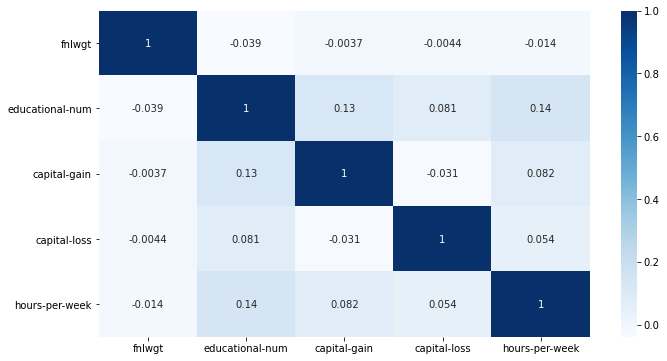

In [22]:
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(11,6))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

[Text(1, 0.5, 'fnlwgt'),
 Text(1, 1.5, 'capital-loss'),
 Text(1, 2.5, 'capital-gain'),
 Text(1, 3.5, 'educational-num'),
 Text(1, 4.5, 'hours-per-week')]

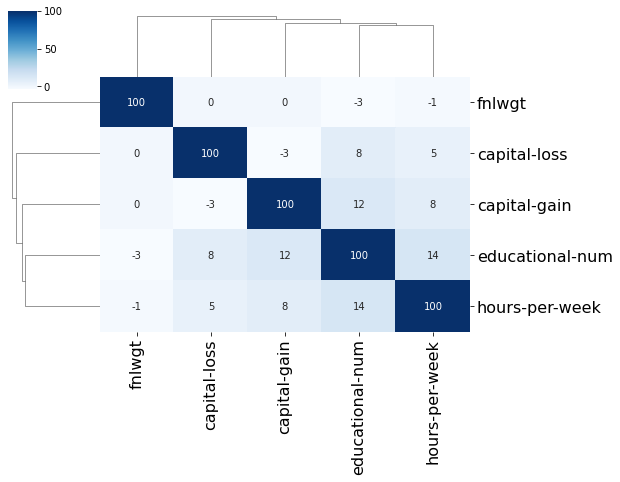

In [23]:
corr = df.corr().mul(100).astype(int)
g= sns.clustermap(data=corr,annot=True,fmt="d",cmap="Blues",figsize=(8,6))
cmap=sns.diverging_palette(h_neg=100,h_pos=150,s=90,as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(),fontsize=16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(),fontsize=16)

#### As we can see through Cluster map no attributes/ columns are highly correlated.

# 2) EDA

##### we are going to create a dictionary in which, all details are available regarding education

In [24]:
edu_level = {}
for x,y in df[["educational-num","education"]].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

### 2.1 Education vs Income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

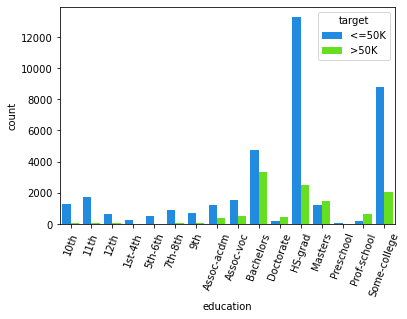

In [25]:

sns1=sns.countplot(x="education", data=df, hue="target", palette="gist_rainbow_r")
sns1
plt.xticks(rotation=70)

<span style = 'color:purple' >**We can see from graph the level of education increases, than the proportion of people who earn more than 50K a year is also increases. But Suprisingly people with Prof-School earning more than 50K a year in comparision with who did Doctorate.**</span>

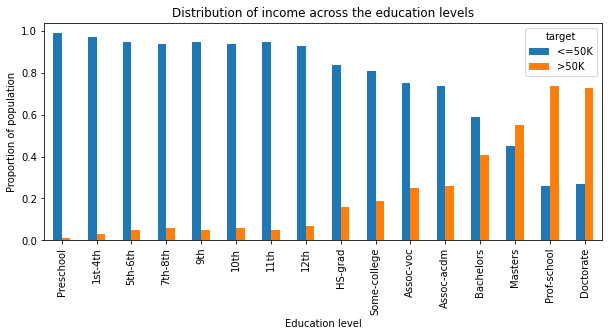

In [26]:
education = round(pd.crosstab(df.education, df.target).div(pd.crosstab(df.education, df.target).apply(sum,1),0),2)

education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind= "bar",title = "Distribution of income across the education levels", figsize=(10,4))

ax.set_xlabel("Education level")
ax.set_ylabel("Proportion of population")

printmd("**We can see from graph the level of education increases, than the proportion of people who earn more than 50K a year is also increases. But Suprisingly people with Prof-School earning more than 50K a year in comparision with who did Doctorate.**")

### 2.2 Gender vs Target

<span style = 'color:purple' >**After seeing graph we can say, more number of Males earn more than 50K a year as compare to Females**</span>

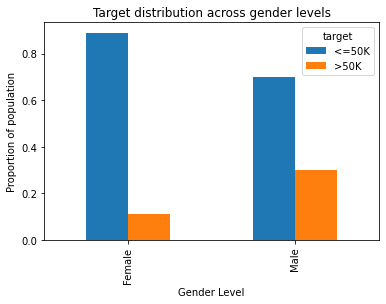

In [27]:
gender = round(pd.crosstab(df.gender, df.target).div(pd.crosstab(df.gender, df.target).apply(sum,1),0),2)

gender.sort_values(by = ">50K", inplace = True)
ax = gender.plot(kind="bar", title= "Target distribution across gender levels")

ax.set_xlabel("Gender Level")
ax.set_ylabel("Proportion of population")
printmd("**After seeing graph we can say, more number of Males earn more than 50K a year as compare to Females**")

<span style = 'color:purple' >**After seeing above graph, we will take deeper look in this graph for wages gap between male & female           we are going to see the earning by working classs           Below graph shows that in every working class earning for females is lower than the males           NOTED:- This wages gap is per our data only, which is incomplete having missing values and all etc.**</span>

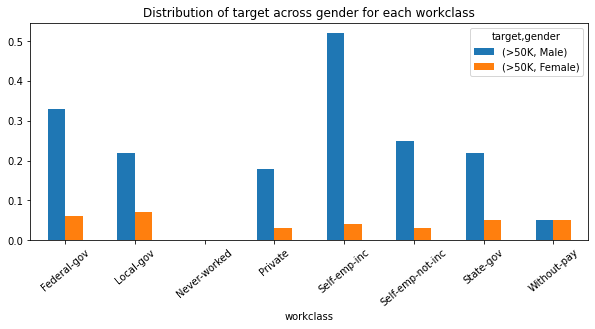

In [28]:
gender_workcalss = round(pd.crosstab(df.workclass, [df.target, df.gender]).div(pd.crosstab(df.workclass,
                                                                                       [df.target, df.gender]).apply(sum,1),0),2)
gender_workcalss[[(">50K", "Male"),(">50K","Female")]].plot(kind = "bar", title = "Distribution of target across gender for each workclass",figsize=(10,4), rot =40)

ax.set_xlabel("Gender level")
ax.set_ylabel("Propportion of population")
printmd("**After seeing above graph, we will take deeper look in this graph for wages gap between male & female\
           we are going to see the earning by working classs\
           Below graph shows that in every working class earning for females is lower than the males\
           NOTED:- This wages gap is per our data only, which is incomplete having missing values and all etc.**")

### 2.3 Occupation vs Income

<span style = 'color:purple' >**Self employed people's earn more than a 50K a year**</span>

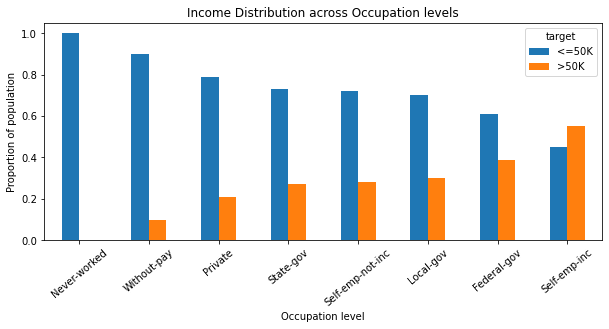

In [29]:
occupation = round(pd.crosstab(df.occupation, df.target).div(pd.crosstab(df.occupation, df.target).apply(sum,1),0),2)

occupation.sort_values(by = ">50K", inplace=True)

ax= occupation.plot(kind="bar",title= "Income Distribution across Occupation levels", figsize=(10,4), rot =40)

ax.set_xlabel("Occupation level")
ax.set_ylabel("Proportion of population")
printmd("**Self employed people's earn more than a 50K a year**")

### 2.4 Workclass vs Income

Text(0, 0.5, 'Proportion of population')

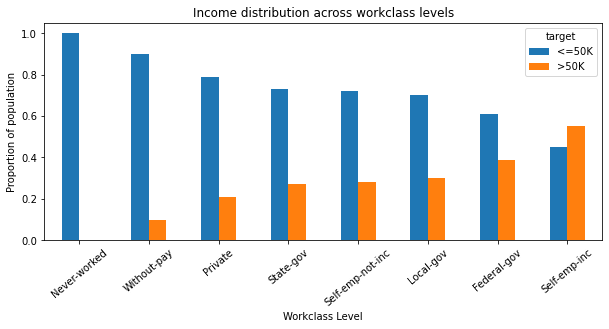

In [30]:
workclass = round(pd.crosstab(df.workclass, df.target).div(pd.crosstab(df.workclass, df.target).apply(sum,1),0),2)

workclass.sort_values(by = ">50K",inplace= True)

ax = workclass.plot(kind="bar",title = "Income distribution across workclass levels",figsize=(10,4), rot=40)

ax.set_xlabel("Workclass Level")
ax.set_ylabel("Proportion of population")

### 2.5 Race vs Income

Text(0, 0.5, 'Proportion o fpopulation')

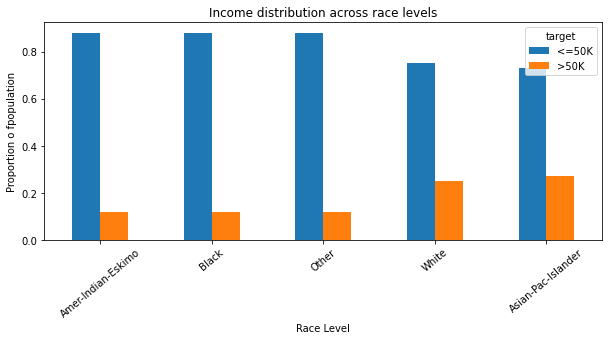

In [31]:
race = round(pd.crosstab(df.race, df.target).div(pd.crosstab(df.race, df.target).apply(sum,1),0),2)

race.sort_values(by = ">50K", inplace = True)

ax= race.plot(kind="bar", title="Income distribution across race levels", figsize=(10,4), rot=40)

ax.set_xlabel("Race Level")
ax.set_ylabel("Proportion o fpopulation")


### 2.6 Native Country

<span style = 'color:purple' >**India & France have more porportions of people's who earns more than 50K a year**</span>

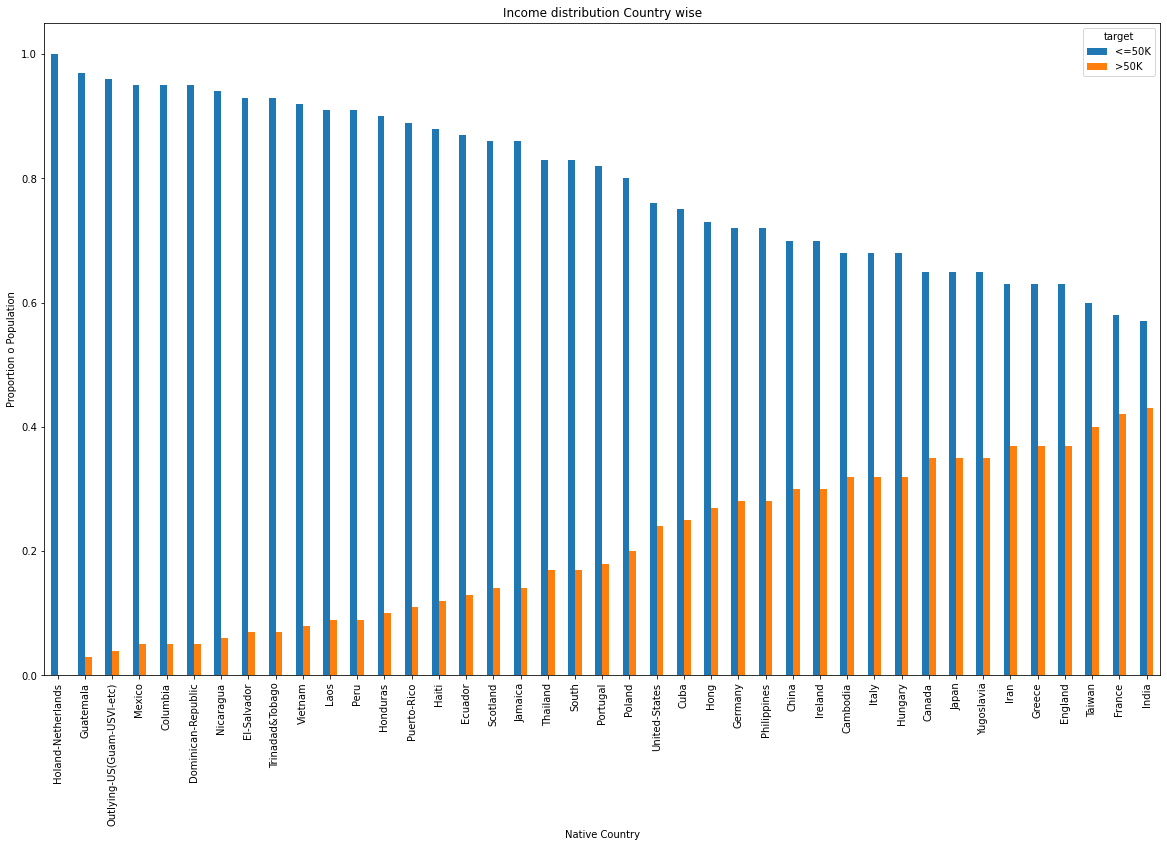

In [32]:
native_country = round(pd.crosstab(df["native-country"], df.target).div(pd.crosstab(df["native-country"], df.target).apply(sum,1),0),2)

native_country.sort_values(by = ">50K", inplace = True)

ax = native_country.plot(kind="bar", title = "Income distribution Country wise", figsize=(20,12))

ax.set_xlabel("Native Country")
ax.set_ylabel("Proportion o Population")
printmd("**India & France have more porportions of people's who earns more than 50K a year**")

### 2.7 Hours per week vs Income

<span style = 'color:purple' >**After seeing the graph the higher the proportion of population making more than 50K a year**</span>

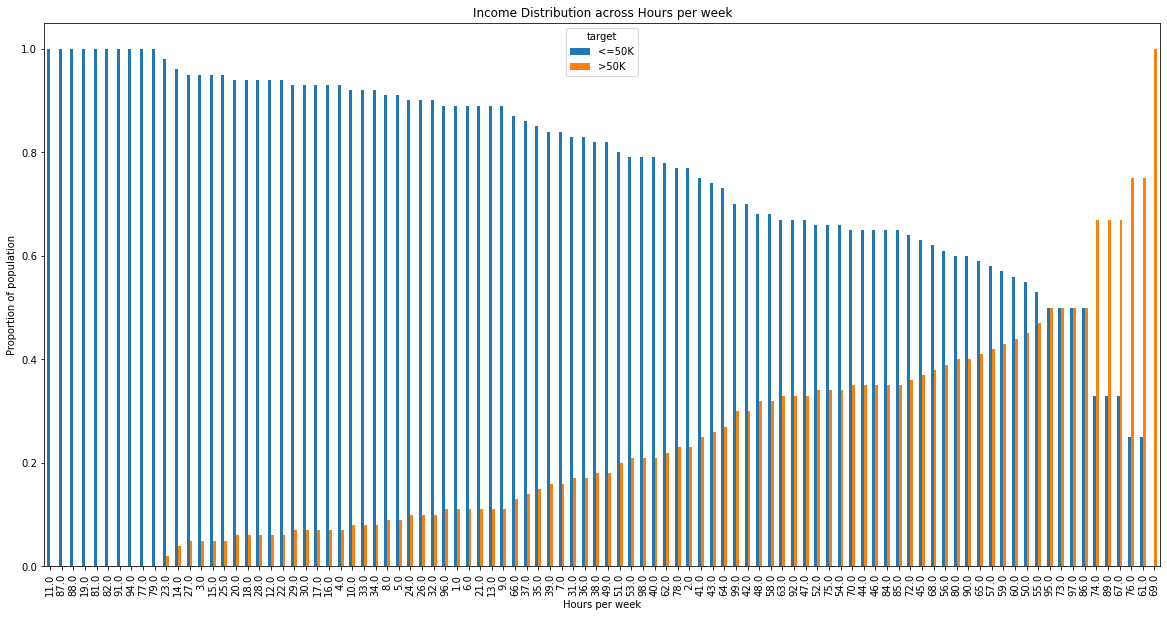

In [33]:
hours_per_week = round(pd.crosstab(df["hours-per-week"],df.target).div(pd.crosstab(df["hours-per-week"], df.target).apply(sum,1),0),2)

hours_per_week.sort_values( by = ">50K", inplace=True)

ax = hours_per_week.plot(kind="bar", title = "Income Distribution across Hours per week", figsize = (20,10))

ax.set_xlabel("Hours per week")
ax.set_ylabel("Proportion of population")
printmd("**After seeing the graph the higher the proportion of population making more than 50K a year**")

### 2.7.(a) Hours Per Week with categories
##### we will split into 3  different columns below 40 , 40 to 60, greater than 60 hrs.

<span style = 'color:purple' >**We can say after seeing graph increasing trend in proportion of population making more than a 50K a year**</span>

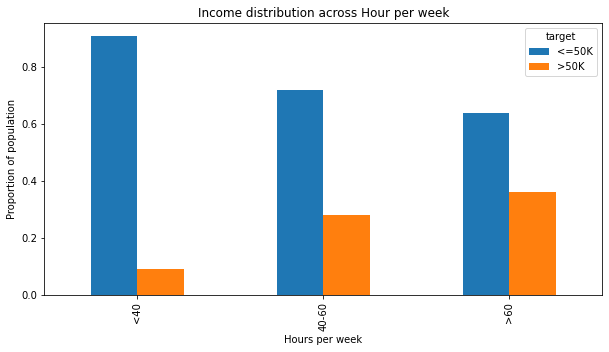

In [34]:
df["hours_worked_bins"] = ["<40" if i < 40 else "40-60" if i <=60
                          else ">60" for i in df["hours-per-week"]]
df["hours_worked_bins"] = df["hours_worked_bins"].astype("category")

hours_per_week = round(pd.crosstab(df.hours_worked_bins, df.target).div(pd.crosstab(df.hours_worked_bins, df.target).apply(sum,1),0),2)

hours_per_week.sort_values(by = ">50K" ,inplace = True)

ax = hours_per_week.plot(kind = "bar", title= "Income distribution across Hour per week", figsize=(10,5))

ax.set_xlabel("Hours per week")
ax.set_ylabel("Proportion of population")
printmd("**We can say after seeing graph increasing trend in proportion of population making more than a 50K a year**")

### 2.7(b) Hours worked across working classes

Text(0, 0.5, 'proportion of populatoion')

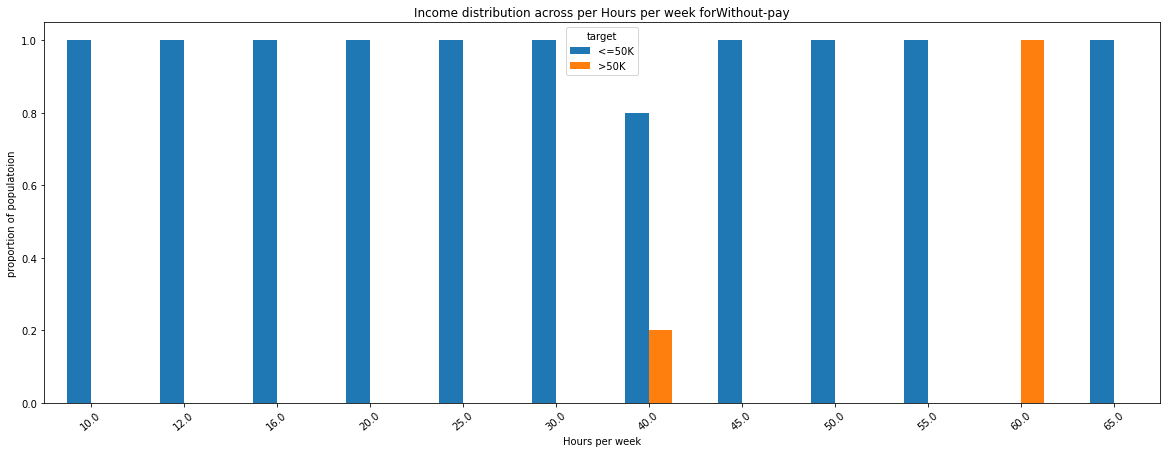

In [35]:
for i in df.workclass.unique():
    df1= df[df.workclass == i]

hours_per_week = round(pd.crosstab(df1["hours-per-week"], df1.target).div(pd.crosstab(df1["hours-per-week"], df1.target).apply(sum,1),0),2)
    
#hours_per_week.sort_values(by = ">50K", inplace = True)

ax = hours_per_week.plot(kind = "bar", title= "Income distribution across per Hours per week for" + i, figsize=(20,7), rot =40)

ax.set_xlabel("Hours per week")
ax.set_ylabel("proportion of populatoion")



# 3 Data Transformations

### 3.1 Feature selection / Dropping unwanted attributes

In [36]:
df.drop(columns = ["education", "fnlwgt","hours-per-week"], inplace=True)
printmd("**Educationa & education-num both are same, so we drop some anyone,\
           same as for hours-per-week we will drop it\
           fnlwgt we did not relate this ao any other attributes**")

<span style = 'color:purple' >**Educationa & education-num both are same, so we drop some anyone,           same as for hours-per-week we will drop it           fnlwgt we did not relate this ao any other attributes**</span>

### 3.2 Normalization

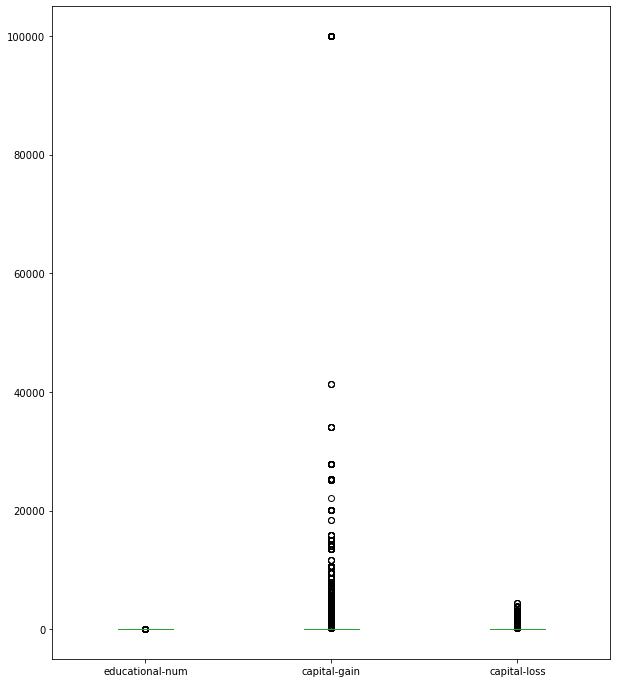

In [37]:
df.select_dtypes(exclude = "category").plot(kind ="box", figsize=(10,12))

# 4. Models

### 4.1 Data Preparation

##### we are using one hot coding to represent all the categorical features in dataset

In [38]:
df_data = df.drop(columns = ["target"])
df_label = df.target

df_cat_onehot = pd.get_dummies(df_data.select_dtypes("category"))
df_non_cat = df_data.select_dtypes(exclude = "category")

df_data_onehot = pd.concat([df_non_cat, df_cat_onehot], axis=1, join = "inner")

##### Spliting  the dataset

In [39]:
from sklearn.model_selection import train_test_split 
printmd("**Spliting the Dataset**")

train_data, test_data, train_label, test_label = train_test_split(df_data_onehot, df_label,test_size = 0.17, random_state = 19)

<span style = 'color:purple' >**Spliting the Dataset**</span>

##### After normalization fitting the data on both train & test

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_data)
train_data = scaler.transform(train_data)

test_data = scaler.transform(test_data)

printmd("**We are doing Normalization  & after that, applying on transform data/ fitting on train & test data**")

<span style = 'color:purple' >**We are doing Normalization  & after that, applying on transform data/ fitting on train & test data**</span>

### 4.1.1.) Model building

In [41]:
def model_eval (actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=["Atcual"], colnames=["Predicted"])
    
    TP = confusion.loc[">50K",">50K"]
    TN = confusion.loc["<=50K","<=50K"]
    FP = confusion.loc["<=50K",">50K"]
    FN = confusion.loc[">50K","<=50K"]
   
    
    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP +FN)
    specificity = TN / (TN + FP)
    error_rate = 1-accuracy
    
    out = {}
    out["accuracy"] = accuracy
    out["precision"] = precision
    out["recall"] = recall
    out["f_measure"] = f_measure
    out["sensitivity"] = sensitivity
    out["specificity"] = specificity
    out["error_rate"] = error_rate
    
    return out

### 4.2. Model Development

### 4.2.(a) Decision Tree
##### in this i'm experimenting with spliting criteia

In [42]:
# Gini
clf_gini = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split= 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print("Decision Tree using Gini Index :%.2f percent."% (round(DTree_Gini["accuracy"]*100,2)))

# Entropy
clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(train_data, train_label)
clf_entropy_pred =clf_entropy.predict(test_data)
DTree_Entropy = model_eval(test_label, clf_entropy_pred)
print("Decision Tree using Entropy : %.2f percent." % (round(DTree_Entropy["accuracy"]*100,2)))

ovl_dtree = round(pd.DataFrame([DTree_Entropy,DTree_Gini], index = ["DTree_Entropy", "DTree_Gini"]),4)
ovl_dtree

Decision Tree using Gini Index :85.27 percent.
Decision Tree using Entropy : 85.30 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Entropy,0.8530,0.7806,0.5302,0.6315,0.5302,0.9536,0.1470
DTree_Gini,0.8527,0.7753,0.5352,0.6333,0.5352,0.9517,0.1473


### 4.2.(b) Support Vector Machine
##### we will search for various kernels with different criteria

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics



#rbf kernal
svm_clf_rbf = svm.SVC(kernel = "rbf", C = 1, tol =1e-3)
svm_clf_rbf.fit(train_data, train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(test_data)
SVM_rbf = model_eval(test_label, svm_clf_rbf_pred)
print("SVM using rbf kernel : %.2f percent." % (round(SVM_rbf["accuracy"]*100,2)))

# Linear kernel
svm_clf_linear = svm.SVC(kernel = "linear")
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
SVM_linear = model_eval(test_label, svm_clf_linear_pred)
print("SVM using linearr kernel : %.2f percent." % (round(SVM_linear["accuracy"]*100,2)))

# Poly kernel
svm_clf_poly = svm.SVC(kernel = "poly")
svm_clf_poly.fit(train_data, train_label)
svm_clf_poly_pred = svm_clf_poly.predict(test_data)
SVM_poly = model_eval(test_label, svm_clf_poly_pred)
print("SVM using poly kernel : %.2f percent." % (round(SVM_poly["accuracy"]*100,2)))

# Sigmoid Kernel
svm_clf_sigmoid = svm.SVC(kernel = "sigmoid")
svm_clf_sigmoid.fit(train_data, train_label)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(test_data)
SVM_sigmoid = model_eval(test_label, svm_clf_sigmoid_pred)
print("SVM using sigmoid kernel : %.2f percent." % (round(SVM_sigmoid["accuracy"]*100,2)))


#overall evaluation
ovl_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ["SVM_rbf","SVM_linear","SVM_poly","SVM_sigmoid"]),4)
display(ovl_svm)

SVM using rbf kernel : 84.62 percent.
SVM using linearr kernel : 85.03 percent.
SVM using poly kernel : 80.47 percent.
SVM using sigmoid kernel : 83.57 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
SVM_rbf,0.8462,0.7367,0.5489,0.6291,0.5489,0.9389,0.1538
SVM_linear,0.8503,0.7373,0.5748,0.6460,0.5748,0.9362,0.1497
SVM_poly,0.8047,0.7102,0.3006,0.4224,0.3006,0.9618,0.1953
SVM_sigmoid,0.8357,0.6928,0.5545,0.6160,0.5545,0.9234,0.1643


### 4.3. Ensemble Models

### 4.3.1. Random Forest
##### we will see Gini, Entropy differently

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [45]:
# Gini
rf_gini = RandomForestClassifier(n_estimators=50,criterion = "gini", max_features =None, min_samples_split =0.1, min_samples_leaf =0.1)
rf_gini.fit(train_data, train_label)
rf_gini_pred = rf_gini.predict(test_data)
RF_gini = model_eval(test_label, rf_gini_pred)
print("Random Forest using Gini Index : %.2f percent." % (round(RF_gini["accuracy"]*100,4)))

# Entropy
rf_entropy = RandomForestClassifier(n_estimators=50,criterion = "entropy", max_features= None, min_samples_split = 0.1, min_samples_leaf = 0.1)
rf_entropy.fit(train_data, train_label)
rf_entropy_pred = rf_entropy.predict(test_data)
RF_entropy = model_eval(test_label, rf_entropy_pred)
print("Random Forest using Entropy: %.2f percent." % (round(RF_entropy["accuracy"]*100,4)))

ovl_rf = round(pd.DataFrame([RF_gini, RF_entropy], index = ["RF_gini", "RF_entropy"]),4 )
ovl_rf

Random Forest using Gini Index : 82.23 percent.
Random Forest using Entropy: 82.23 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
RF_gini,0.8223,0.6741,0.4876,0.5659,0.4876,0.9266,0.1777
RF_entropy,0.8223,0.6741,0.4876,0.5659,0.4876,0.9266,0.1777


### 4.3.2. ADAboost

In [46]:
ada = AdaBoostClassifier(n_estimators=99)
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label,ada_pred)
printmd("Adaboost : %.2f percent." % (round(adaboost["accuracy"]*100,2)))

ovl_ada= round(pd.DataFrame([adaboost], index=["adaboost"]),4)
ovl_ada

<span style = 'color:purple' >Adaboost : 85.98 percent.</span>

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8598,0.7929,0.555,0.653,0.555,0.9548,0.1402


### 4.3.3. Logistic Regression

In [47]:
log_reg = LogisticRegression(penalty = "l2", dual=False, tol = 1e-4, fit_intercept =True,
                       solver = "liblinear")
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)

print("Logistic Regression : %.2f percent." % (round(logistic_reg["accuracy"]*100,3)))

ovl_logreg = round(pd.DataFrame([logistic_reg], index = ["logistic_reg"]),4)
ovl_logreg

Logistic Regression : 84.98 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8498,0.7266,0.59,0.6512,0.59,0.9308,0.1502


### 4.3.4. K Nearest Neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_outs = []
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label)
    knn_pred = knn.predict(test_data)
    knn_perf = model_eval(test_label, knn_pred)
    knn_perf["k"] = i
    knn_outs.append(knn_perf)

ovl_knn = round(pd.DataFrame(knn_outs),4)
display(ovl_knn)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,k
0,0.7870,0.5537,0.5332,0.5432,0.5332,0.8661,0.2130,1
1,0.8036,0.5995,0.5220,0.5581,0.5220,0.8913,0.1964,3
2,0.8078,0.6143,0.5134,0.5594,0.5134,0.8995,0.1922,5
3,0.8048,0.6110,0.4911,0.5445,0.4911,0.9025,0.1952,7
4,0.8072,0.6220,0.4805,0.5422,0.4805,0.9090,0.1928,9
5,0.8088,0.6269,0.4820,0.5450,0.4820,0.9106,0.1912,11
6,0.8043,0.6184,0.4607,0.5280,0.4607,0.9114,0.1957,13
7,0.8072,0.6306,0.4551,0.5287,0.4551,0.9169,0.1928,15
8,0.8089,0.6403,0.4465,0.5261,0.4465,0.9218,0.1911,17
9,0.8080,0.6466,0.4237,0.5119,0.4237,0.9278,0.1920,19


### Optimizing KNN- search for k-value via GridSearchCV

### From above code we will find the best parameters but it will take really long time, so i stop this cell & move forward, On comparision of all models.

# 5 Model Evaluation

### 5.1. Overall Performance Statistics

In [49]:
overall_eval = pd.concat([ovl_dtree, ovl_rf, ovl_svm,ovl_ada, ovl_logreg,ovl_knn], axis=0)

overall_eval.sort_values(by = ["f_measure", "accuracy"], ascending =False, inplace = True)
printmd("**Combing all models performances**")
overall_eval

<span style = 'color:purple' >**Combing all models performances**</span>

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,k
adaboost,0.8598,0.7929,0.5550,0.6530,0.5550,0.9548,0.1402,NaN
logistic_reg,0.8498,0.7266,0.5900,0.6512,0.5900,0.9308,0.1502,NaN
SVM_linear,0.8503,0.7373,0.5748,0.6460,0.5748,0.9362,0.1497,NaN
DTree_Gini,0.8527,0.7753,0.5352,0.6333,0.5352,0.9517,0.1473,NaN
DTree_Entropy,0.8530,0.7806,0.5302,0.6315,0.5302,0.9536,0.1470,NaN
SVM_rbf,0.8462,0.7367,0.5489,0.6291,0.5489,0.9389,0.1538,NaN
SVM_sigmoid,0.8357,0.6928,0.5545,0.6160,0.5545,0.9234,0.1643,NaN
RF_gini,0.8223,0.6741,0.4876,0.5659,0.4876,0.9266,0.1777,NaN
RF_entropy,0.8223,0.6741,0.4876,0.5659,0.4876,0.9266,0.1777,NaN
2,0.8078,0.6143,0.5134,0.5594,0.5134,0.8995,0.1922,5.0


### 5.2) Roc Curve

In [50]:
def generateRoc(test_data,test_label, classifiers, pred_labels, plot_labels, limiter):
    color = ["tab:blue", "tab:orange", "tab:green","tab:red", "tab:purple", "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
    y_test = label_binarize(test_label,classes=["<=50K",">50K"])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index(">50K")
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index],pos_label=1)
        
        lw=2
        
        plt.plot(fpr,tpr,color=color[ i % len(color)],lw=lw,label=plot_labels[i])
        
        plt.plot([0,1],[0,1],color="navy", lw=lw,linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic (ROC)")
        plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


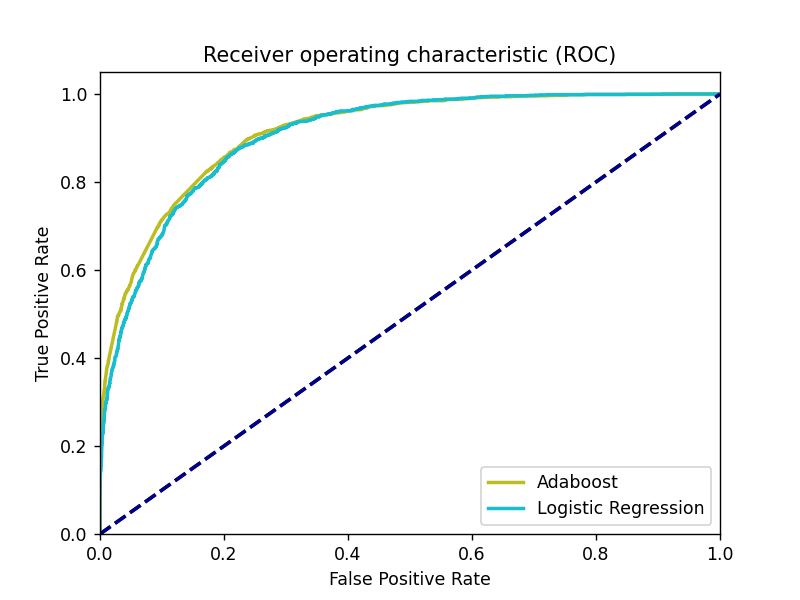

In [51]:
%matplotlib notebook
classifier_list = [clf_gini
                   ,clf_entropy,
                   svm_clf_rbf,
                   svm_clf_linear,
                   svm_clf_poly,
                   svm_clf_sigmoid,
                   rf_gini,
                   rf_entropy,
                   ada,
                   log_reg]

pred_list = [clf_gini_pred,
             clf_entropy_pred,
             svm_clf_rbf_pred,
             svm_clf_linear_pred,
             svm_clf_poly_pred,
             svm_clf_sigmoid_pred,
             rf_gini_pred,
             rf_entropy_pred,
             ada_pred,
             log_reg_pred]
clf_labels = ["DTree Gini",
             "DTree Entropy",
             "svm_clg_rbf_pred","svm_clf_linear_pred","svm_clf_poly_pred","svm_clf_sigmoid_pred",
             "RForest_Gini",
             "RForest_Entropy",
             "Adaboost",
             "Logistic Regression"]
limiter = ["Adaboost","Logistic Regression",
           # "RForest_Gini","Rforest_Entropy","DTree Gini","DTree Entropy"
          ]
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)

##### Let's see the actual and predicted  Income.

In [52]:
print("Actual Income:\n",test_label)
print("Predicted Income:\n",ada_pred)

Actual Income:
 44575    <=50K
5542      >50K
23440    <=50K
34224    <=50K
32339    <=50K
         ...  
30251    <=50K
36321    <=50K
40688    <=50K
48331     >50K
42449    <=50K
Name: target, Length: 8304, dtype: category
Categories (2, object): [<=50K, >50K]
Predicted Income:
 ['<=50K' '>50K' '<=50K' ... '<=50K' '>50K' '<=50K']


## Saving the model
##### We are going to save AdaBoost Classifier model with max. accuracy  86%

In [53]:
import joblib 
joblib.dump(ada,"ada_Preidcted_Income.obj")

['ada_Preidcted_Income.obj']

## Conclusion:
##### Our AdaBoost Classifier model is the best model among all with highest accuracy 86% , not only accuracy it also has the highest precision & F-measure among all models